This is the Julia version of Week 1 Exercise.   You can download and install Julia directly from https://julialang.org/.
One installed, go to the Julia command line, a black screen, type in 
Using Pkg
Then write in:
Pkg.add("IJulia")


This will take a while, but when done, you can close Julia.  Then start your Jupyter notebook.
Navigate to the location of your data.   Then open a new Julia in the upper right side, but click on Julia, not Matlab, not Python.  

You have to add various programs and packages when you use Julia.  THis is different from Matlab where a lot of programs are set on the path, but similar to Python.  Note that you can work directly with the Data in DataFrames.



In [27]:
using Pkg

In [28]:
Pkg.add("DataFrames")

 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [4]:
using DataFrames

In [29]:
Pkg.add("CSV")


 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [30]:

Pkg.add("GLM")
Pkg.add("StatsPlots")
Pkg.add("MLBase")


 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]
 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [26]:

using DataFrames
using CSV
using Plots

using GLM
using Statistics
using StatsPlots
using MLBase

In [20]:
ENV["COLUMNS"] = 1000


1000

In [21]:
df = DataFrame(CSV.File("cex5.csv"))
first(df,5)

,id,year,month,count,occasion,advanced,alcbev,appar,college,entert,food,foodaway,health,hsplus,income,midwest,nohs,northeast,older,read,rural,smsa,south,west
,Int64,Int64,Int64,Int64,Int64,Int64,Float64,Float64,Int64,Float64,Float64,Float64,Float64,Int64,Float64,Int64,Int64,Int64,Int64,Float64,Int64,Int64,Int64,Int64
1,251162,2013,1,1,1,0,6.67,27.78,1,38.0,108.33,115.56,74.56,0,50.0,0,0,0,0,4.44,0,1,0,1
2,251210,2013,1,1,1,0,1.67,107.56,1,20.33,195.33,78.89,55.56,0,89.17,0,0,0,0,7.78,0,1,0,1
3,251214,2013,1,1,1,0,0.0,0.0,0,27.22,37.78,20.0,195.67,1,53.81,1,0,0,0,4.44,0,1,0,0
4,251247,2013,1,1,1,0,0.0,0.0,1,31.67,187.78,23.11,146.22,0,45.22,1,0,0,0,0.78,0,1,0,0
5,251271,2013,1,1,1,0,36.67,220.89,0,305.44,72.22,130.0,240.27,1,69.83,0,0,0,1,28.22,0,1,1,0


In [24]:
names(df)

24-element Array{String,1}:
 "id"       
 "year"     
 "month"    
 "count"    
 "occasion" 
 "advanced" 
 "alcbev"   
 "appar"    
 "college"  
 "entert"   
 "food"     
 "foodaway" 
 "health"   
 "hsplus"   
 "income"   
 "midwest"  
 "nohs"     
 "northeast"
 "older"    
 "read"     
 "rural"    
 "smsa"     
 "south"    
 "west"     

In [32]:
colnames = Symbol[]
for i in string.(names(df))
    push!(colnames,Symbol(replace(replace(replace(strip(i)," " => "_"),"-" => "_"), "/" => "_")))
end

rename!(df, colnames);

In [33]:
colnames

24-element Array{Symbol,1}:
 :id       
 :year     
 :month    
 :count    
 :occasion 
 :advanced 
 :alcbev   
 :appar    
 :college  
 :entert   
 :food     
 :foodaway 
 :health   
 :hsplus   
 :income   
 :midwest  
 :nohs     
 :northeast
 :older    
 :read     
 :rural    
 :smsa     
 :south    
 :west     

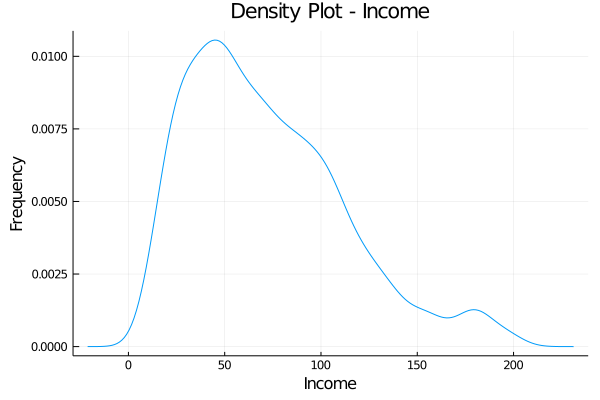

In [34]:
density(df.income, title = "Density Plot - Income", ylabel = "Frequency", xlabel = "Income", legend = false)

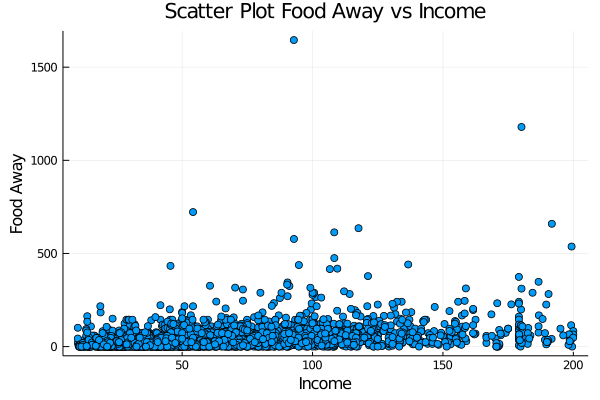

In [36]:
train_plot = scatter(df.income,df.foodaway, title = "Scatter Plot Food Away vs Income", ylabel = "Food Away", xlabel = "Income",legend = false)

In [42]:
Pkg.add("GLM")
using GLM

 Resolving package versions...
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
 [no changes]
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
 [no changes]


In [43]:
ols = lm(@formula(foodaway~ income), df)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

foodaway ~ 1 + income

Coefficients:
─────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────
(Intercept)  13.7688     2.99145     4.60    <1e-5    7.90261   19.635   
income        0.524114   0.0361752  14.49    <1e-44   0.453175   0.595053
─────────────────────────────────────────────────────────────────────────

In [55]:
coef(ols)

2-element Array{Float64,1}:
 13.76879898869914  
  0.5241142488378218

In [45]:
r2(ols)

0.08257924671016248

In [49]:
yhat = predict(ols);


In [57]:
resid = df.foodaway - yhat;
rsq1 =  1 - var(resid)/var(df.foodaway);
rsq1

0.08257924671016237

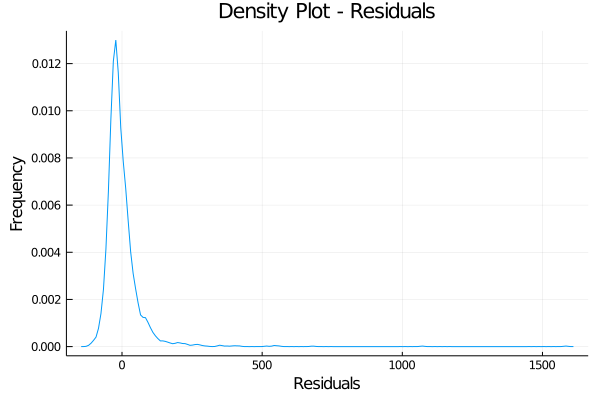

In [51]:
density(resid, title = "Density Plot - Residuals", ylabel = "Frequency", xlabel = "Residuals", legend = false)

In [52]:
Pkg.add("HypothesisTests");
using HypothesisTests;

 Resolving package versions...
 Installed Combinatorics ─── v1.0.2
 Installed Roots ─────────── v1.0.8
 Installed HypothesisTests ─ v0.10.2
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Project.toml`
  [09f84164] + HypothesisTests v0.10.2
  Updating `C:\Users\ApostlePaul1906\.julia\environments\v1.2\Manifest.toml`
  [861a8166] + Combinatorics v1.0.2
  [09f84164] + HypothesisTests v0.10.2
  [f2b01f46] + Roots v1.0.8


┌ Info: Precompiling HypothesisTests [09f84164-cd44-5f33-b23f-e6b0d136a0d5]
└ @ Base loading.jl:1242


In [60]:
jbstat = JarqueBeraTest(resid);
jbstat

Jarque-Bera normality test
--------------------------
Population details:
    parameter of interest:   skewness and kurtosis
    value under h_0:         "0 and 3"
    point estimate:          "8.246051314450348 and 139.04419106679003"

Test summary:
    outcome with 95% confidence: reject h_0
    one-sided p-value:           <1e-99

Details:
    number of observations:         2334
    JB statistic:                   1.82636e6
